# OBJETIVO

Este notebook tiene como objetivo **comparar distintos modelos de regresión basados en Boosting y métodos de vecinos** para entender **cómo cada algoritmo aprende patrones y maneja el error** en un mismo conjunto de datos.

A lo largo del trabajo:
- Se exploraron los datos y se dividieron en entrenamiento y prueba para asegurar una evaluación justa.  
- Se implementaron y analizaron modelos clásicos (**KNN, Random Forest, AdaBoost**) y modelos más modernos y potentes (**Gradient Boosting, XGBoost, LightGBM, CatBoost**).  
- Se aplicó **búsqueda de hiperparámetros (GridSearchCV)** para optimizar el rendimiento de cada modelo.  
- Finalmente, se compararon los resultados en términos de **RMSE y R²**, junto con sus gráficas de predicción.

El principal aporte de este notebook es **mostrar de forma práctica cómo evoluciona el desempeño de los algoritmos de boosting**, desde enfoques simples como AdaBoost hasta frameworks avanzados como LightGBM y CatBoost.

> Todo este análisis se realizó con **datos dummy (simulados)** con el fin de **conocer el comportamiento, ventajas y desventajas de cada modelo**.  
El siguiente paso será **aplicar este conocimiento sobre datos reales**, eligiendo el modelo más apropiado con base en su desempeño y características observadas en este estudio.

# LIBRERÍAS Y DATOS

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("/Users/johar/Desktop/Desarrollo/proyecto_dpd/forecast/data_dummy.csv")

# EXPLORACIÓN Y SEPARACIÓN

In [ ]:
# ordenamos según la columna x y creamos una copia
df = df.sort_values('x').copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       901 non-null    float64
 1   y       901 non-null    float64
dtypes: float64(2)
memory usage: 14.2 KB


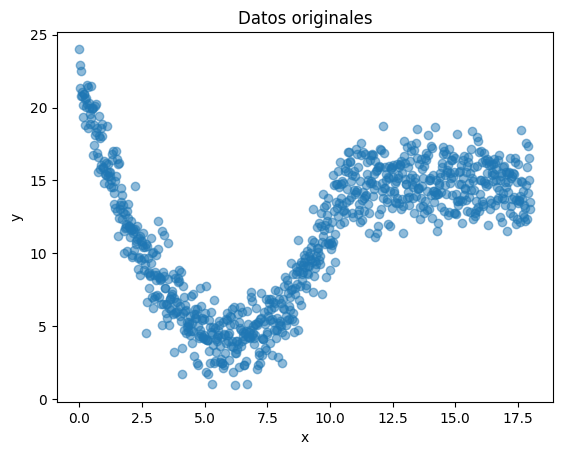

In [ ]:
# gráfico de dispersión
plt.scatter(df['x'], df['y'], alpha=0.5)
plt.title("Datos originales")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# separamos los datos en conjuntos de entrenamiento y prueba
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.sort_index(inplace=True)
X_test.sort_index(inplace=True)
y_train.sort_index(inplace=True)
y_test.sort_index(inplace=True)

# 1. KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
# paso 1: elije el hiperparámetro
n_neighbors = 23 # usará inicilamente 23 vecinos para estimar los valores de y.
knn = KNeighborsRegressor(n_neighbors=n_neighbors)
knn

,n_neighbors,23
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
# paso 2: entrenamos el modelo
knn.fit(X_train, y_train)

,n_neighbors,23
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
# paso 3: aplicamos  el metodo predict
y_pred_knn = knn.predict(X_test) # el modelo predice los valores de y usando los datos de prueba X_test

print("\nKNN Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_knn)) # mide qué tan lejos están las predicciones de los valores reales.
print("R2:", r2_score(y_test, y_pred_knn)) # indica qué tan bien el modelo explica los datos


KNN Regressor
MSE: 2.283206798356852
R2: 0.9064320973146505


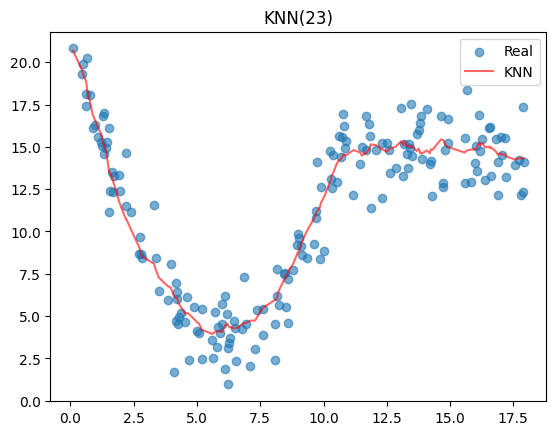

In [ ]:
# comparamos los valores reales vs las predicciones del modelo KNN
plt.scatter(X_test, y_test, label="Real", alpha=0.6)
plt.plot(X_test, y_pred_knn, label="KNN", alpha=0.6,c='red')
plt.legend()
plt.title(f"KNN({n_neighbors})")
plt.show()

> Logra captar la forma general de los datos, pero suaviza demasiado los picos y valles.

## 1.1 Grid Search

In [17]:
# Sirve para buscar automáticamente los mejores hiperparámetros de un modelo
from sklearn.model_selection import GridSearchCV

In [18]:
# paso 1: definir posibles hiperparametros
parameters = {'n_neighbors': range(5,31)} # aqui va a tantear con 5,6,7,...,29,30

In [19]:
# paso 2: Definimos el modelo
modelo_knn = KNeighborsRegressor()
modelo_knn

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
# paso 3: definir condiciones de busqueda
modelo_knn_grid = GridSearchCV(modelo_knn, parameters, cv = 5, # usamosvalidación cruzada de 5 particiones
    scoring='neg_root_mean_squared_error')
modelo_knn_grid

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': range(5, 31)}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [21]:
# paso 4: entrenar el modelo
modelo_knn_grid.fit(X_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': range(5, 31)}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,19


In [23]:
# muestra el modelo KNN con los mejores hiperparámetros 
modelo_knn_grid.best_estimator_

,n_neighbors,19
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
# muestra la mejor puntuación obtenida durante la búsqueda 
modelo_knn_grid.best_score_

np.float64(-3.2820173930335472)

# 2. KNN REG

In [26]:
# Es parecido al KNeighborsRegressor, pero en lugar de usar un número fijo de vecinos (k), usa todos los puntos dentro de un radio específico
from sklearn.neighbors import RadiusNeighborsRegressor

In [27]:
# radius controla el "alcance" en el que busca vecinos
rnn = RadiusNeighborsRegressor(radius=3,weights='distance')
rnn.fit(X_train, y_train)
y_pred_rnn = rnn.predict(X_test)

print("\nRadius Neighbors Regressor")
print("RMSE:", mean_squared_error(y_test, y_pred_rnn))
print("R2:", r2_score(y_test, y_pred_rnn))


Radius Neighbors Regressor
RMSE: 2.5818332765381187
R2: 0.8941941111323028


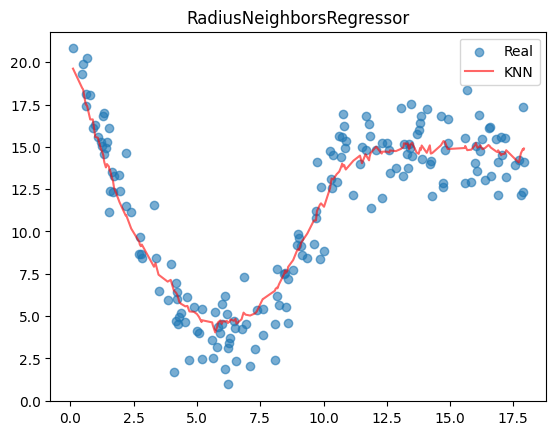

In [28]:
plt.scatter(X_test, y_test, label="Real", alpha=0.6)
plt.plot(X_test, y_pred_rnn, label="KNN", alpha=0.6,c='red')
plt.legend()
plt.title("RadiusNeighborsRegressor")
plt.show()

# RandomForest

In [29]:
# modelo de aprendizaje de conjunto (ensemble) que usa muchos árboles de decisión 
# # y promedia sus resultados para obtener predicciones más precisas y estables.
from sklearn.ensemble import RandomForestRegressor

In [30]:
forest_model = RandomForestRegressor(max_depth=7, n_estimators=15)
forest_model.fit(X_train, y_train)

,n_estimators,15
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_pred = forest_model.predict(X_test)

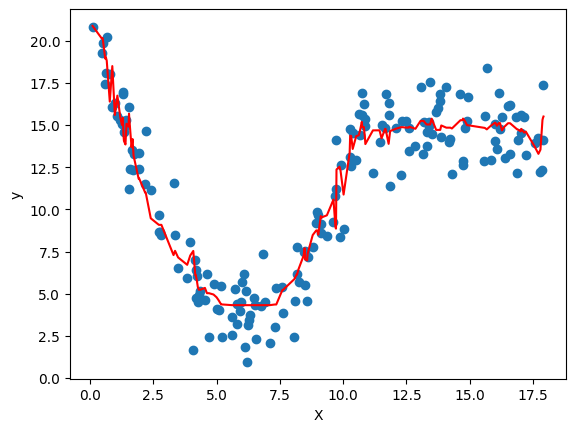

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred,color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

> Captura mejor los cambios con alta precisión y poco error

In [33]:
# paso 1: definir posibles hiperparametros
parameters3 = {'max_depth': range(1,11), 'n_estimators': range(5,51,5)}

In [34]:
# paso 2: Definir el modelo
modelo_rf = RandomForestRegressor()
modelo_rf

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
# paso 3: definir condiciones de busqueda
modelo_rf_grid = GridSearchCV(modelo_rf, parameters3, cv = 5,
    scoring='neg_root_mean_squared_error', verbose= 3,return_train_score=True)
modelo_rf_grid

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': range(1, 11), 'n_estimators': range(5, 51, 5)}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


In [36]:
#paso 4: entrenar el modelo
modelo_rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=1, n_estimators=5;, score=(train=-1.855, test=-9.002) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=5;, score=(train=-3.196, test=-6.509) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=5;, score=(train=-4.035, test=-3.363) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=5;, score=(train=-3.634, test=-2.739) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=5;, score=(train=-3.628, test=-2.770) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=10;, score=(train=-1.854, test=-8.938) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=10;, score=(train=-3.063, test=-6.812) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=10;, score=(train=-4.037, test=-3.313) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=10;, score=(train=-3.627, test=-3.663) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=10;, score=(train=-3.611, test

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': range(1, 11), 'n_estimators': range(5, 51, 5)}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,5


In [37]:
modelo_rf_grid.best_estimator_

,n_estimators,5
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
modelo_rf_grid.best_score_

np.float64(-3.351376436476594)

# 3. AdaBoost Regressor

AdaBoost mejora modelos débiles combinándolos secuencialmente para enfocarse en los errores anteriores, logrando un modelo más preciso, aunque sensible a outliers y menos potente que métodos más recientes como GradientBoost o XGBoost.

| Algoritmo     | ¿Mejora sobre? | Fortalezas                      | Debilidades                |
| ------------- | :------------: | ------------------------------- | -------------------------- |
| AdaBoost      |        -       | Sencillez, interpretabilidad    | Sensible a outliers        |
| GradientBoost |    AdaBoost    | Flexible, buen rendimiento      | Más lento, posible overfit |
| XGBoost       |  GradientBoost | Muy rápido, robusto, regulariza | Tuning complejo            |
| LightGBM      |  GradientBoost | Más rápido y liviano aún        | Puede sobreajustar         |
| CatBoost      |  GradientBoost | Maneja bien variables categ.    | Puede ser más pesado       |

AdaBoost (Adaptive Boosting) combina muchos modelos débiles (por ejemplo, árboles de profundidad 1) en una secuencia donde cada modelo nuevo se enfoca en los errores del anterior, ajustando pesos a cada muestra según su dificultad de predicción.

**Algoritmo:**

1. Asigna el mismo peso a cada muestra al inicio.
2. Entrena un modelo débil y evalúa errores.
3. Incrementa el peso de las muestras mal predichas.
4. Entrena el siguiente modelo considerando estos nuevos pesos.
5. El resultado final es la suma ponderada de todos los modelos.

**Predicción final:**

$$
F(x) = \sum_{m=1}^M \alpha_m h_m(x)
$$

* $h_m(x)$: modelo débil número $m$
* $\alpha_m$: peso basado en el desempeño del modelo $m$

**Fortalezas:**

* Sencillo de implementar.
* Menos propenso a sobreajustar que un solo árbol.
* Bueno para datos simples y poco ruidosos.

**Debilidades:**

* Sensible a valores atípicos y ruido (el modelo insiste en predecir bien outliers).
* Tiende a ser menos efectivo que otros métodos modernos en datasets grandes.

In [39]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=410, random_state=42) # random_state no singnifica nada, solo obtener lo mismo al reporcesar con los mismos hiperparametros
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("\nAdaBoost")
print("RMSE:", mean_squared_error(y_test, y_pred_ada))
print("R2:", r2_score(y_test, y_pred_ada))


AdaBoost
RMSE: 2.7124782617186805
R2: 0.8888401601592675


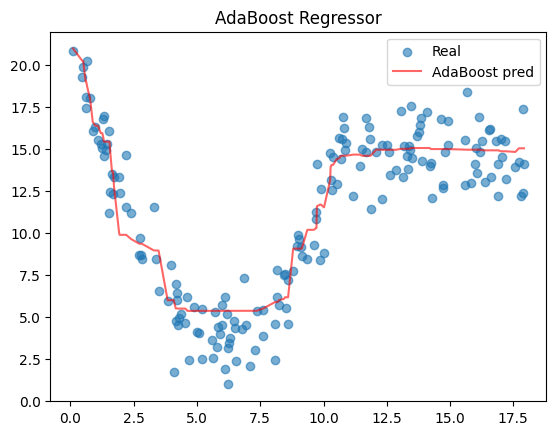

In [40]:
plt.scatter(X_test, y_test, label="Real", alpha=0.6)
plt.plot(X_test, y_pred_ada, label="AdaBoost pred", alpha=0.6,c='red')
plt.legend()
plt.title("AdaBoost Regressor")
plt.show()

In [41]:
#paso 1: definir posibles hiperparametros
parameters4 = {'n_estimators': range(50,600,20)}

In [42]:
#paso 2: Definir el modelo
modelo_ar = AdaBoostRegressor()
modelo_ar

,estimator,None
,n_estimators,50
,learning_rate,1.0
,loss,'linear'
,random_state,None


In [43]:
#paso 3: definir condiciones de busqueda
modelo_ar_grid = GridSearchCV(modelo_ar, parameters4, cv = 5,
    scoring='neg_root_mean_squared_error', verbose= 3,return_train_score=True)
modelo_ar_grid

,estimator,AdaBoostRegressor()
,param_grid,"{'n_estimators': range(50, 600, 20)}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,estimator,None


In [44]:
#paso 4: entrenar el modelo
modelo_ar_grid.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END n_estimators=50;, score=(train=-1.462, test=-8.454) total time=   0.0s
[CV 2/5] END n_estimators=50;, score=(train=-1.542, test=-2.593) total time=   0.0s
[CV 3/5] END n_estimators=50;, score=(train=-1.527, test=-3.269) total time=   0.0s
[CV 4/5] END n_estimators=50;, score=(train=-1.508, test=-1.587) total time=   0.0s
[CV 5/5] END n_estimators=50;, score=(train=-1.525, test=-1.518) total time=   0.0s
[CV 1/5] END n_estimators=70;, score=(train=-1.458, test=-8.209) total time=   0.0s
[CV 2/5] END n_estimators=70;, score=(train=-1.551, test=-2.794) total time=   0.0s
[CV 3/5] END n_estimators=70;, score=(train=-1.502, test=-3.323) total time=   0.0s
[CV 4/5] END n_estimators=70;, score=(train=-1.490, test=-1.593) total time=   0.0s
[CV 5/5] END n_estimators=70;, score=(train=-1.513, test=-1.512) total time=   0.0s
[CV 1/5] END n_estimators=90;, score=(train=-1.461, test=-8.496) total time=   0.0s
[CV 2/5] END n

,estimator,AdaBoostRegressor()
,param_grid,"{'n_estimators': range(50, 600, 20)}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,estimator,None


In [45]:
modelo_ar_grid.best_estimator_

,estimator,None
,n_estimators,190
,learning_rate,1.0
,loss,'linear'
,random_state,None


In [46]:
modelo_ar_grid.best_score_

np.float64(-3.3817437091286044)

# 4. Gradient Boosting Regressor

Gradient Boosting mejora cada modelo corrigiendo los errores del anterior mediante gradientes, logrando gran precisión y flexibilidad, aunque puede ser lento y propenso al sobreajuste si no se regula bien.

Gradient Boosting construye modelos de manera secuencial, pero cada nuevo modelo se entrena para corregir los **residuos** (errores) del modelo anterior, usando el gradiente de la función de pérdida. Es la base de muchas variantes modernas.

**Algoritmo básico:**

1. Inicia con una predicción básica ($F_0$), por ejemplo, el promedio.
2. Para cada iteración $m$:

   * Calcula el residuo: $r_i = y_i - F_{m-1}(x_i)$
   * Ajusta un modelo a estos residuos.
   * Actualiza la predicción:
     $F_m(x) = F_{m-1}(x) + \nu h_m(x)$

     * $\nu$ es la tasa de aprendizaje ($0 < \nu \leq 1$)
     * $h_m(x)$: modelo ajustado al residuo.

**Fortalezas:**

* Gran capacidad de ajuste, muy flexible.
* Funciona bien en una amplia variedad de problemas y tamaños de datos.
* Permite ajustar muchas funciones de pérdida.

**Debilidades:**

* Puede sobreajustar si se usan muchos árboles y poca regularización.
* Más lento de entrenar que métodos basados en árboles simples.

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

In [48]:
print("\nGradientBoosting")
print("RMSE:", mean_squared_error(y_test, y_pred_gbr))
print("R2:", r2_score(y_test, y_pred_gbr))


GradientBoosting
RMSE: 2.4291051462694857
R2: 0.9004530495870128


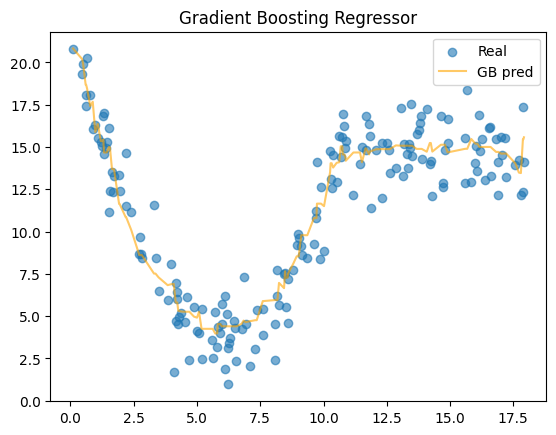

In [49]:
plt.scatter(X_test, y_test, label="Real", alpha=0.6)
plt.plot(X_test, y_pred_gbr, label="GB pred", alpha=0.6, c='orange')
plt.legend()
plt.title("Gradient Boosting Regressor")
plt.show()

> Muestra un equilibrio entre suavidad y capacidad de capturar detalles reales de los datos

# 5. XGBoost Regressor

XGBoost (Extreme Gradient Boosting) es una **optimización y extensión** de Gradient Boosting, diseñada para mayor velocidad, eficiencia y robustez.

**Mejoras sobre GBR:**

* Regularización explícita (L1 y L2) para reducir sobreajuste.
* Optimización de recursos (procesamiento paralelo, manejo de datos faltantes).
* Pruning de árboles y técnicas de early stopping.

**Función objetivo típica:**

$$
\text{Obj} = \sum_{i=1}^n l(y_i, \hat{y}_i) + \sum_{k=1}^K \Omega(f_k)
$$

* $l$: función de pérdida
* $\Omega(f_k)$: regularización sobre la complejidad del árbol $f_k$

**Fortalezas:**

* Rápido y escalable para grandes datasets.
* Gran capacidad de ajuste.
* Muy competitivo en competencias de machine learning.

**Debilidades:**

* Muchos hiperparámetros, puede ser complejo de tunear.
* Más pesado para tareas muy sencillas o bases pequeñas.

In [51]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=80, learning_rate=0.08, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [52]:
print("\nXGBoost")
print("RMSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2:", r2_score(y_test, y_pred_xgb))


XGBoost
RMSE: 2.388153441044366
R2: 0.9021312879191957


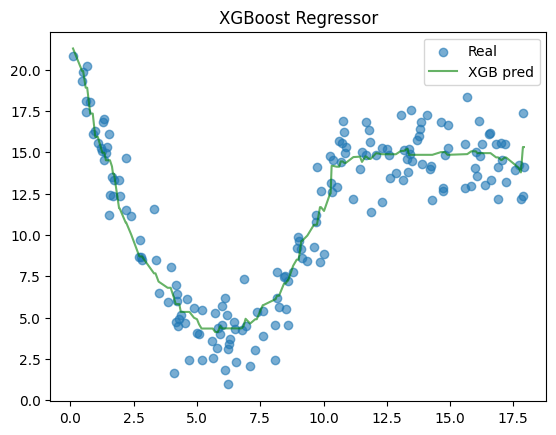

In [53]:
plt.scatter(X_test, y_test, label="Real", alpha=0.6)
plt.plot(X_test, y_pred_xgb, label="XGB pred", alpha=0.6, c='green')
plt.legend()
plt.title("XGBoost Regressor")
plt.show()

> Logra un endimiento más consistente que modelos anteriores

# 6. LightGBM Regressor

LightGBM es otra mejora sobre Gradient Boosting, desarrollada por Microsoft, centrada en velocidad y bajo consumo de memoria.
Utiliza técnicas de histogramas y crecimiento de árbol basado en "leaf-wise" (crece donde reduce más la pérdida).

**Innovaciones:**

* Construcción de histogramas para dividir nodos rápidamente.
* Crecimiento leaf-wise en lugar de level-wise.
* Manejo eficiente de grandes cantidades de datos y muchas variables categóricas.

**Fortalezas:**

* Más rápido que XGBoost en datasets grandes.
* Bajo consumo de memoria.
* Buen manejo de variables categóricas.

**Debilidades:**

* Leaf-wise puede sobreajustar si no se controla.
* Resultados menos interpretables en algunos casos.

In [55]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.08, max_depth=3, random_state=42,linear_tree=True)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 1
[LightGBM] [Info] Start training from score 11.395971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [56]:
print("\nLightGBM")
print("RMSE:", mean_squared_error(y_test, y_pred_lgbm))
print("R2:", r2_score(y_test, y_pred_lgbm))


LightGBM
RMSE: 2.316981165462918
R2: 0.9050479928625641


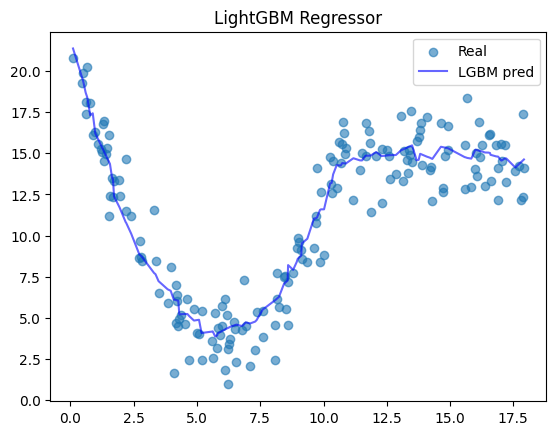

In [57]:
plt.scatter(X_test, y_test, label="Real", alpha=0.6)
plt.plot(X_test, y_pred_lgbm, label="LGBM pred", alpha=0.6, c='blue')
plt.legend()
plt.title("LightGBM Regressor")
plt.show()

# 7. CatBoost Regressor

CatBoost es otro algoritmo de boosting muy eficiente, desarrollado por Yandex, que **destaca en el manejo automático de variables categóricas** y evita el uso de one-hot encoding.

**Características clave:**

* Transformación eficiente de variables categóricas (sin perder información).
* Reduce el “prediction shift” que ocurre por el orden de datos.
* Buen desempeño "out-of-the-box", con menos tuning.

**Fortalezas:**

* Ideal para datasets con muchas variables categóricas.
* Suele requerir menos preprocesamiento.
* Buena precisión y velocidad.

**Debilidades:**

* Más pesado que LightGBM en algunos casos.
* Menos documentado que XGBoost/LightGBM (pero está mejorando mucho).

In [61]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbose=1)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

0:	learn: 4.4754297	total: 55.3ms	remaining: 5.48s
1:	learn: 4.1310140	total: 55.6ms	remaining: 2.72s
2:	learn: 3.8445502	total: 55.7ms	remaining: 1.8s
3:	learn: 3.5778970	total: 55.8ms	remaining: 1.34s
4:	learn: 3.3344080	total: 55.9ms	remaining: 1.06s
5:	learn: 3.1096394	total: 56ms	remaining: 878ms
6:	learn: 2.9290648	total: 56.1ms	remaining: 746ms
7:	learn: 2.7668787	total: 56.2ms	remaining: 647ms
8:	learn: 2.6010547	total: 56.3ms	remaining: 569ms
9:	learn: 2.4761375	total: 56.4ms	remaining: 508ms
10:	learn: 2.3653465	total: 56.5ms	remaining: 457ms
11:	learn: 2.2571236	total: 56.6ms	remaining: 415ms
12:	learn: 2.1601402	total: 56.7ms	remaining: 379ms
13:	learn: 2.0880108	total: 56.8ms	remaining: 349ms
14:	learn: 2.0119666	total: 56.9ms	remaining: 322ms
15:	learn: 1.9532783	total: 57ms	remaining: 299ms
16:	learn: 1.8928239	total: 57.1ms	remaining: 279ms
17:	learn: 1.8312347	total: 57.1ms	remaining: 260ms
18:	learn: 1.7952224	total: 57.2ms	remaining: 244ms
19:	learn: 1.7521857	total:

In [62]:
print("\nCatBoost")
print("RMSE:", mean_squared_error(y_test, y_pred_cat))
print("R2:", r2_score(y_test, y_pred_cat))


CatBoost
RMSE: 2.32761526303368
R2: 0.9046121978187847


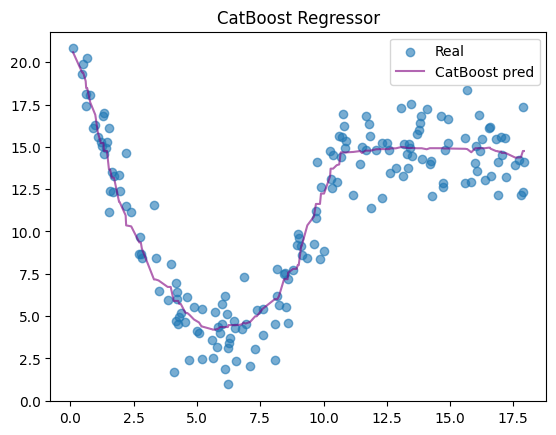

In [63]:
plt.scatter(X_test, y_test, label="Real", alpha=0.6)
plt.plot(X_test, y_pred_cat, label="CatBoost pred", alpha=0.6, c='purple')
plt.legend()
plt.title("CatBoost Regressor")
plt.show()

# 8. COMPARACIÓN GENERAL

In [ ]:
# Calculamos y almacenamos las métricas MSE y R² para comparar el desempeño de AdaBoost, Gradient Boosting, XGBoost, LightGBM y CatBoost.

models = ['AdaBoost', 'GBR', 'XGBoost', 'LightGBM', 'CatBoost']
rmses = [
    mean_squared_error(y_test, y_pred_ada),
    mean_squared_error(y_test, y_pred_gbr),
    mean_squared_error(y_test, y_pred_xgb),
    mean_squared_error(y_test, y_pred_lgbm),
    mean_squared_error(y_test, y_pred_cat)
]
r2s = [
    r2_score(y_test, y_pred_ada),
    r2_score(y_test, y_pred_gbr),
    r2_score(y_test, y_pred_xgb),
    r2_score(y_test, y_pred_lgbm),
    r2_score(y_test, y_pred_cat)
]


Comparación de modelos de boosting en regresión:
      Model      RMSE        R2
0  AdaBoost  2.712478  0.888840
1       GBR  2.429105  0.900453
2   XGBoost  2.388153  0.902131
3  LightGBM  2.316981  0.905048
4  CatBoost  2.327615  0.904612


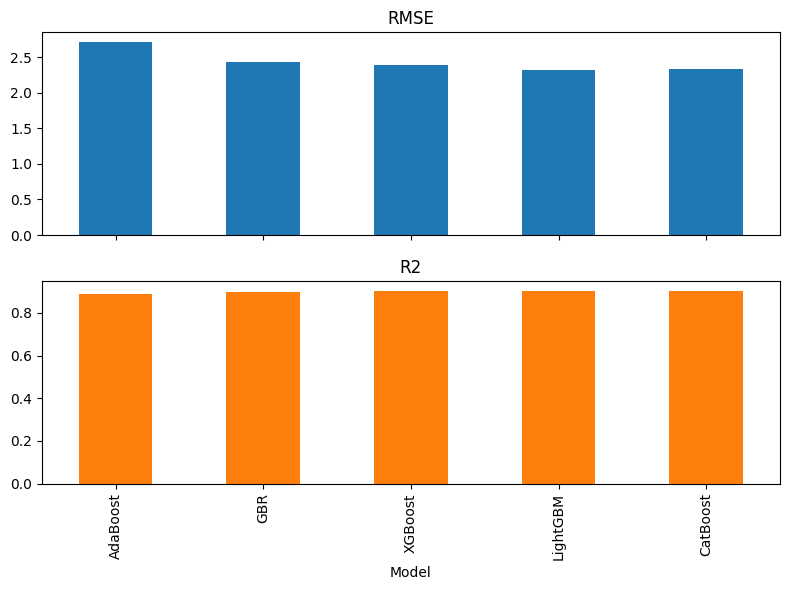

In [65]:
df_results = pd.DataFrame({'Model': models, 'RMSE': rmses, 'R2': r2s})
print("\nComparación de modelos de boosting en regresión:")
print(df_results)
df_results.plot(x='Model', y=['RMSE', 'R2'], kind='bar', subplots=True, legend=False, layout=(2,1), figsize=(8,6), title=['RMSE','R2'])
plt.tight_layout()
plt.show()

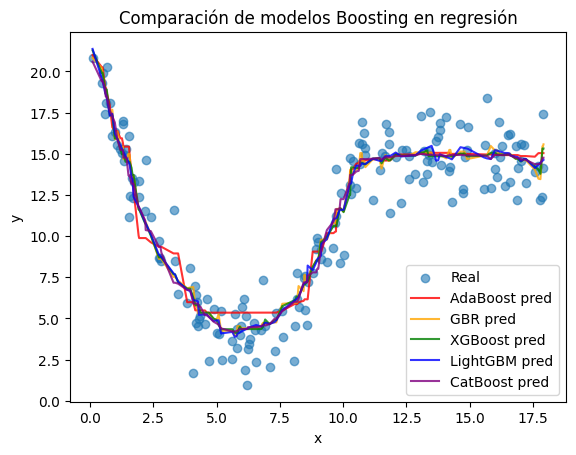

In [66]:
plt.scatter(X_test, y_test, label="Real", alpha=0.6)
plt.plot(X_test, y_pred_ada, label="AdaBoost pred", alpha=0.8, c='red')
plt.plot(X_test, y_pred_gbr, label="GBR pred", alpha=0.8, c='orange')
plt.plot(X_test, y_pred_xgb, label="XGBoost pred", alpha=0.8, c='green')
plt.plot(X_test, y_pred_lgbm, label="LightGBM pred", alpha=0.8, c='blue')
plt.plot(X_test, y_pred_cat, label="CatBoost pred", alpha=0.8, c='purple')
plt.legend()
plt.title("Comparación de modelos Boosting en regresión")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

- **LightGBM** obtiene el mejor rendimiento (RMSE 2.317, R² 0.905).  
- **CatBoost** y **XGBoost** tienen resultados muy similares, también con alto desempeño.  
- **GBR** queda un poco detrás, pero sigue siendo sólido.  
- **AdaBoost** muestra el peor resultado general.  

> En general, notamos que las diferencias entre los mejores modelos son **mínimas (~0.4 en RMSE)**, por lo que la elección final dependería más de la **velocidad de entrenamiento**, el **tipo de datos** (CatBoost maneja bien categóricas) o la **facilidad de ajuste de hiperparámetros**.